# Heston Stochastic Volatility Model
------------------
> **Idriss Afra**

This project aims to implement the Heston model (1993) and price Volatility Swaps.

## Model Dynamics
The Heston model is defined by the following pair of SDEs under the Risk-Neutral measure :   

\begin{equation}
\begin{split}
dS_t & = (r_t - q_t) \times S_t \times dt + \sqrt(V_t) \times S_t \times dW^S_t \\
dV_t & = κ (θ - V_t) dt + σ \sqrt(V_t) dW^V_t \\
d<W^S, W^V>_t & = ρ × dt
\end{split}
\end{equation}

Where :    
- $S_t$ is the stock or index price
- $r_t$ is the deterministic instantaneous forward interest rate
- $q_t$ is the deterministic instantaneous forward dividend yield
- $V_t$ is the stochastic spot's variance
- $κ$ is the rate of reversion to the long-term price variance
- $θ$ is the long-term price variance
- $σ$ is the volatility of the stochastic volatility $\sqrt(V_t)$
- $\left(W^S, W^V\right)$ are $ρ$-correlated standard brownian motions


##Vanilla Heston Price

###The Fourier Inversion Theorem
This theorem links the cumulative distribution function $F_X$ to the characteristic function $ϕ_X$ :

\begin{equation}
\begin{split}
F_X(x) & = \frac{1}{2} - \frac{1}{2π} ∫_{-∞}^{+∞} \frac{e^{-iux} ϕ_X(u)}{iu} du\\
& = \frac{1}{2} - \frac{1}{2π} ∫_{-∞}^{+∞} Re\left(\frac{e^{-iux} ϕ_X(u)}{iu}\right) du \\
& = \frac{1}{2} - \frac{1}{π} ∫_{0}^{+∞} Re\left(\frac{e^{-iux} ϕ_X(u)}{iu} \right) du \\
\end{split}
\end{equation}

###The Characteristic Function
Let $X_t = log(S_t)$ and suppose that the underlying does not pay dividends.

In this case : $dX_t = (r_t - \frac{V_t}{2})dt + \sqrt(V_t) dW^V_t$

Therefore, the characteristic function of $X_T$ at $t$ is :    

$$
ϕ_{X_T}(u, t) = f\left(u, t, X_t, V_t\right) = E^{RN}\left(e^{iuX_T} | X_t, V_t\right)
$$

$\left(ϕ_{X_T}(., t)\right)_{t \le T}$ is a Martingale since it is a conditional expected value.

Applying the Itô's lemma and making its drift equal to zero gives the following PDE under the Risk-Neutral measure:     

$$
f_t' + \left(r_t - \frac{V_t}{2}\right)f_x' + κ (θ - V_t)f_v' + \frac{V_t}{2}f_{xx}'' + \frac{\sigma^2 V_t}{2}f_{vv}'' + σ V_t ρ f_{xv}'' = 0
$$

Further, we know that the characteristic function $\left(ϕ_{X_T}(., t)\right)_{t \le T}$ has the following exponential affine form :

$$
ϕ_{X_T}(u, t) = f\left(u, t, X_t, V_t\right) = e^{A(t, T) + B(t, T) X_t + C(t, T) V_t +iuX_t}
$$

With : $ϕ_{X_T}(u, T) = E^{RN}\left(e^{iuX_T}\right)$

We inject this affine form in the above PDE and solve analytically the functions $A(t, T)$, $B(t, T)$, and $C(t, T)$ :

\begin{equation}
\begin{split}
A(\tau) & = \bar{r}_{t,T} i u \tau + \frac{κθ}{σ^2} \left(-(ρσiu - κ - M)τ -2log\left(\frac{1-Ne^{Mτ}}{1-N}\right) \right) \\
B(τ) & = 0 \\
C(τ) & = \frac{(e^{Mτ} - 1)(ρσiu - κ - M)}{σ^2 (1-Ne^{Mτ})} \\
\text{Where :} \\
τ & = T - t\\
\bar{r}_{t,T} & = \frac{1}{τ} \int_t^Tr_u du \\
M & = \sqrt{(ρσiu - κ)^2 + σ^2 (iu + u^2)} \\
N & = \frac{ρσiu - κ - M}{ρσiu - κ + M} \\
\end{split}
\end{equation}

###The Vanilla Price Formula
The call option price is :

\begin{equation}
\begin{split}
C_t(T, K) & = e^{-\bar{r}_{t,T} (T-t)} E^{RN}\left( (S_T-K)^+ \right) \\
& = e^{-\bar{r}_{t,T} (T-t)} E^{RN}\left(1_{S_T>K}S_T\right) - K e^{-\bar{r}_{t,T} (T-t)} E^{RN}\left(1_{S_T>K}\right)
\end{split}
\end{equation}

Where : \\
\begin{equation}
\begin{split}
E^{RN}\left(1_{S_T>K}\right) & = P^{RN}\left(S_T>K\right) \\
& = 1 - F_{X_T}\left(log(K)\right) \\
& = \frac{1}{2} + \frac{1}{π} ∫_{0}^{+∞} Re\left(\frac{K^{-iu} ϕ_{X_{T}}(u)}{iu}\right) du \\
\end{split}
\end{equation}

On the other hand, by using the Radon-Nikodym theorem :

$$
e^{-\bar{r}_{t,T} (T-t)} E^{RN}\left(1_{S_T>K}S_T\right) = S_t E^{S}\left(1_{S_T>K}\right) = S_t P^{S}\left(S_T>K\right)
$$

<br>Similarly to the above development done under the Risk-Neutral measure, we find the following result :

\begin{equation}
\begin{split}
S_t E^{S}\left(1_{S_T>K}\right) & = S_t P^{S}\left(S_T>K\right) \\
& = \frac{S_t}{2} + \frac{e^{-\bar{r}_{t,T} (T-t)}}{π} ∫_{0}^{+∞} Re\left(\frac{K^{-iu} ϕ_{X_{T}}(u-i)}{iu}\right) du \\
\end{split}
\end{equation}

Finally :

$$
C_t(T, K) = \frac{S_t}{2} + \frac{e^{-\bar{r}_{t,T} (T-t)}}{π} ∫_{0}^{+∞} Re\left(\frac{K^{-iu} ϕ_{X_{T}}(u-i)}{iu}\right)du - K e^{-\bar{r}_{t,T} (T-t)} \left( \frac{1}{2} + \frac{1}{π} ∫_{0}^{+∞} Re\left(\frac{K^{-iu} ϕ_{X_{T}}(u)}{iu}\right) du  \right)
$$

The put option price can then be computed using the call/put parity.

In [ ]:
import math
import cmath
from scipy.integrate import quad

# Vanilla Option Price under the Heston model (1993)

def characteristic_func(params, u, r, T, X0) :
  """
  The characteristic function of ln(S(T)) under the Heston model.
  """
  # Heston parameters :
  kappa = params["Kappa"]
  theta = params["Theta"]
  initVar = params["Initial Variance"]
  corr = params["Correlation"]
  sigma = params["Volatility Of Volatility"]

  # Intermediate parameters :
  L = corr * sigma * 1j * u
  M = cmath.sqrt((L - kappa)**2 + sigma**2 * (1j * u + u**2))
  N = (L - kappa - M) / (L - kappa + M)
  M_T = M * T

  # Intermediate functions :
  A_T = r * 1j * u * T + (kappa * theta / sigma**2) * (-T * (L - kappa - M) - 2 * cmath.log((1 - N * cmath.exp(M_T)) / (1 - N)))
  C_T = (cmath.exp(M_T) - 1) * (L - kappa - M) / ((1 - N * cmath.exp(M_T)) * sigma**2)

  # Analytical solution of the Heston characteristic function :
  return cmath.exp(A_T + C_T * initVar + 1j * u * X0)

def integral_1(params, r, T, S0, K) :
  """
  The first integration : We use the quad SciPy method based on the Fortran library QUADPACK.
  We choose to use 10000 as the upper bound instead of math.inf to reduce the execution time and to prevent having numbers outside the range of doubles.
  """
  func = lambda u : (K**(-1j * u) * characteristic_func(params, u - 1j, r, T, math.log(S0)) / (1j * u)).real
  return quad(func, 0, 10000)[0] #math.inf

def integral_2(params, r, T, S0, K) :
  """
  The second integration : We use the quad SciPy method based on the Fortran library QUADPACK.
  We choose to use 10000 as the upper bound instead of math.inf to reduce the execution time and to prevent having numbers outside the range of doubles.
  """
  func = lambda u : (K**(-1j * u) * characteristic_func(params, u, r, T, math.log(S0)) / (1j * u)).real
  return quad(func, 0, 10000)[0] #math.inf

def heston_vanilla(params, S0, K, T, r, flavor) :
  """
  Vanilla price under the Heston model.
  The Put prices are deduced from the Call / Put parity.
  """
  call_price = 0.5 * S0 + math.exp(-r * T) * integral_1(params, r, T, S0, K) / math.pi - K * math.exp(-r * T) * (0.5 + integral_2(params, r, T, S0, K) / math.pi)
  return call_price if flavor.upper()=="CALL" else call_price - S0 + K * math.exp(-r * T)


Let's make the Heston prices match the Black-Scholes prices...

In [ ]:
from scipy.stats import norm

def black_scholes(flavor, K, T, S, r, vol, q=0) :
  """
  The Black-Scholes price.
  """
  v2T = vol**2 * T
  d1 = (math.log(S/K) + (r - q) * T + v2T / 2) / v2T**0.5
  d2 = d1 - v2T**0.5
  phi = 1 if flavor.upper() == "CALL" else  -1
  return phi * (S * math.exp(-q * T) * norm.cdf(phi * d1) - K * math.exp(-r * T) * norm.cdf(phi * d2))

# Degenerated Test
S, K, T, r, sigma = 100, 90, 1, 0.015, 0.2
print("The test case : Call option with Spot={}, K={}, T={}, r={}, and vol={}".format(S, K, T, r, sigma))
print("To match Heston and Black models, we set the following parameter values : ")
params = {"Kappa" : 0, "Theta" : round(sigma**2, 2), "Initial Variance" : round(sigma**2, 2), "Correlation" : 0, "Volatility Of Volatility" : 0.000001}
print(params)
print("-----------------------------------------------------------------------------------------------------------")
print("The Heston price : {:.6f}".format(heston_vanilla(params, 100, 90, 1, 0.015, "Call")))
print("The Black price : {:.6f}".format(black_scholes("Call", 90, 1, 100, 0.015, 0.2)))

The test case : Call option with Spot=100, K=90, T=1, r=0.015, and vol=0.2
To match Heston and Black models, we set the following parameter values : 
{'Kappa': 0, 'Theta': 0.04, 'Initial Variance': 0.04, 'Correlation': 0, 'Volatility Of Volatility': 1e-06}
-----------------------------------------------------------------------------------------------------------
The Heston price : 14.498532
The Black price : 14.498532


## Heston Calibration
In order to use the Heston model, we need to set its five different parameters : $κ$, $θ$, $V_0$, $ρ$, and $σ$.

The rate of reversion $κ$ is generally given as input. The remaining parameters are then calibrated by minimizing the following error function :    

$$
(θ, V_0, ρ, σ) = ArgMin \left( \frac{1}{M} ∑_{i = 1}^M\left(Price_{i}^{Heston}(θ, V_0, ρ, σ) - Price_{i}^{Market}\right)^2 \right)
$$

<br>In this project, we use the **differential_evolution** SciPy method which finds the global minimum of a multivariate function. This method does not need initial guess values and can handle constraints.

In order to reduce the execution time and simplify the minimization problem, $ρ$ and $σ$ are estimated using historical data.

In [ ]:
from scipy.optimize import differential_evolution, NonlinearConstraint

# We ignore the differential_evolution warnings for display purposes
import warnings
warnings.filterwarnings("ignore")

def heston_calibration(S0, zc_rate, T, strikes, flavors, prices, corr, vol, kappa = 0.02) :
  """
  Heston calibration algorithm : Kappa is given in input, Corr and Vol of Vol are estimated via historical analysis.
  """
  # Theta and V0 bounds
  bounds = ((0.0001, 1), (0.0001, 0.8))

  # The constraint 2 * Kappa * Theta > VolOfVol**2 is needed to make sure that the stochastic variance is strictly positive
  def constraint(params) :
    return 2 * kappa * params[0] - vol**2
  nlc = NonlinearConstraint(constraint, 1e-6, np.inf)

  # The global minimization algorithm stops when the objective function reaches 1e-4 or after finding 15 different local minimum points
  def stop_early(xk, convergence):
      error = obj_func(xk, S0, zc_rate, T, strikes, flavors, prices, kappa, corr, vol)
      stop_early.counter += 1
      print("Local minimum point number {} : {}".format(stop_early.counter, error))
      if error < 1e-4 or  stop_early.counter == 15:
        return True
  stop_early.counter = 0

  res = differential_evolution(obj_func, args=(S0, zc_rate, T, strikes, flavors, prices, kappa, corr, vol),
                               bounds=bounds,
                               constraints=(nlc),
                               callback=stop_early)
  return res.x

def obj_func(parameters, S0, zc_rate, T, strikes, flavors, prices, kappa, corr, vol) :
  """
  The objective function of the Heston calibration process.
  """
  nb_instrs = 0
  sse = 0
  params = {"Kappa" : kappa, "Theta" : parameters[0], "Initial Variance" : parameters[1], "Correlation" : corr, "Volatility Of Volatility" : vol}
  for j in range(len(strikes)) :
      sse += (prices[j] - heston_vanilla(params, S0, strikes[j], T, zc_rate, flavors[j]))**2
      nb_instrs += 1
  return sse / nb_instrs


##Application : META US Equity
Let us calibrate the Heston model on Meta US Equity Options asof June 15th 2023.

In [ ]:
from datetime import date
import numpy as np

# Today date
now_date = date(2023, 6, 15)

"""
Meta US Equity Data :
"""
# Spot Price
S0 = 281.83

# Meta US Market Data of the Tenor 6M (It does not pay Dividends!!)
market_tenor = date(2023, 12, 15)
T = (market_tenor - now_date).days / 365
fwd = 289.65
zc_rate = math.log(fwd / S0) / T
market_strikes_6m = np.array([265, 270, 275, 280, 285, 290, 295])
market_flavors_6m = np.array(["Put"] * 5 + ["Call"] * 2)
market_prices_6m = np.array([20.4, 22.4, 24.55, 26.85, 29.25, 30.5, 28.2])

# Historical Analysis : Based on Daily Returns and their 1Y Volatilities from 15/06/2021 to 15/06/2023
corr = 0.13
vol_of_vol = 0.003

In [ ]:
import timeit

kappa = 0.02

print("Heston Calibration : ")
print("-----------------------------------------------------")
start = timeit.default_timer()
params = heston_calibration(S0, zc_rate, T, market_strikes_6m, market_flavors_6m, market_prices_6m, corr, vol_of_vol, kappa)
stop = timeit.default_timer()
print("-----------------------------------------------------")
print("End of calibration after : {:.2f}s".format(stop - start))
print("-----------------------------------------------------")
print("Results :")
parameters = {"Kappa" : kappa, "Theta" : params[0], "Initial Variance" : params[1], "Correlation" : corr, "Volatility Of Volatility" : vol_of_vol}
parameters

Heston Calibration : 
-----------------------------------------------------
Local minimum point number 1 : 0.47284972447519286
Local minimum point number 2 : 0.47284972447519286
Local minimum point number 3 : 0.47284972447519286
Local minimum point number 4 : 0.45088381287270646
Local minimum point number 5 : 0.45088381287270646
Local minimum point number 6 : 0.4464749969635227
Local minimum point number 7 : 0.4452480199171414
Local minimum point number 8 : 0.4433917561781877
Local minimum point number 9 : 0.4432648672753506
Local minimum point number 10 : 0.4432626447278312
Local minimum point number 11 : 0.4432626447278312
Local minimum point number 12 : 0.4432626447278312
-----------------------------------------------------
End of calibration after : 41.39s
-----------------------------------------------------
Results :


{'Kappa': 0.02,
 'Theta': 0.7452281946490433,
 'Initial Variance': 0.15510556968036793,
 'Correlation': 0.13,
 'Volatility Of Volatility': 0.003}

Market Prices vs Heston Calibrated Prices :
---------------------------------------------
Heston Price :  19.6949
Market Price :  20.4
Absolute Calibration Error :  0.7051
---------------------------------------------
Heston Price :  21.8533
Market Price :  22.4
Absolute Calibration Error :  0.5467
---------------------------------------------
Heston Price :  24.1385
Market Price :  24.55
Absolute Calibration Error :  0.4115
---------------------------------------------
Heston Price :  26.549
Market Price :  26.85
Absolute Calibration Error :  0.301
---------------------------------------------
Heston Price :  29.0826
Market Price :  29.25
Absolute Calibration Error :  0.1674
---------------------------------------------
Heston Price :  31.3961
Market Price :  30.5
Absolute Calibration Error :  0.8961
---------------------------------------------
Heston Price :  29.3027
Market Price :  28.2
Absolute Calibration Error :  1.1027
---------------------------------------------


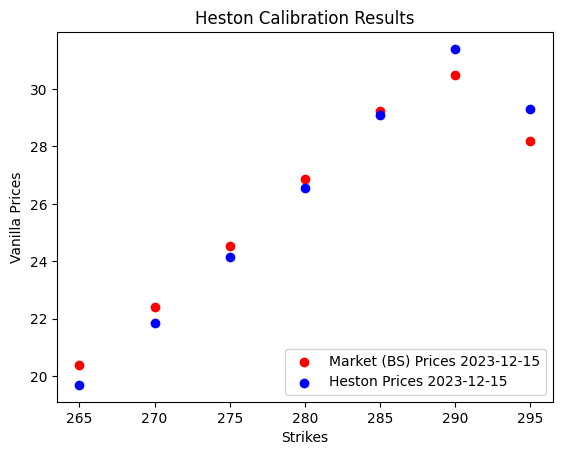

In [ ]:
import matplotlib.pyplot as plt

print("Market Prices vs Heston Calibrated Prices :")
print("---------------------------------------------")

heston_prices = []
for j in range(len(market_strikes_6m)) :
  heston_price = heston_vanilla(parameters, S0, market_strikes_6m[j], T, zc_rate, market_flavors_6m[j])
  heston_prices.append(heston_price)
  market_price = market_prices_6m[j]
  print("Heston Price : ", round(heston_price, 4))
  print("Market Price : ", round(market_price, 4))
  print("Absolute Calibration Error : ", round(abs(heston_price - market_price), 4))
  print("---------------------------------------------")

plt.title("Heston Calibration Results")
plt.ylabel("Vanilla Prices")
plt.xlabel("Strikes")
plt.scatter(market_strikes_6m, market_prices_6m, color="red", label="Market (BS) Prices " + str(market_tenor))
plt.scatter(market_strikes_6m, heston_prices, color="blue", label="Heston Prices " + str(market_tenor))
plt.legend(loc="lower right")
plt.show()

##Fair Variance Strike
The Fair Variance Strike $K_{Var}$ is written as : $\frac{1}{T}∫_0^TE(V_t)dt$, where $(V_t)_{t \ge 0}$ is the stochastic spot's variance.

The Fair Variance is computed  analytically under the Heston model. In fact, since :

$$
V_T = V_0 + ∫_0^Tκ(θ - V_t)dt+∫_0^Tσ\sqrt(V_t) dW^V_t
$$

Then :
$$
E(V_T) = V_0 + κθT - κ∫_0^T E(V_t)dt
$$

Which implies the following ODE :           
$$
\frac{dE(V_T)}{dT} = κθ - κE(V_T)
$$

With the following solution :    
$$
E(V_T) = θ + (V_0 - θ) e^{-κT}
$$

And finally:
$$
K_{Var} = \frac{1}{T} ∫_0^T E(V_T) = \frac{1 - e^{-κT}}{κT} V_0 + \left(1 - \frac{1 - e^{-κT}}{κT}\right) θ
$$

In [ ]:
def fair_var_strike(params, T):
  """
  The Heston Fair Var Strike up to T
  """
  # Heston parameters :
  kappa = params["Kappa"]
  theta = params["Theta"]
  initVar = params["Initial Variance"]
  corr = params["Correlation"]
  sigma = params["Volatility Of Volatility"]

  # Intermediate parameters :
  K_T = kappa * T
  exp_K_T = (1 - math.exp(- K_T)) / K_T

  return initVar * exp_K_T + theta * (1 - exp_K_T)

In [ ]:
fair_var = fair_var_strike(parameters, T)
print("The Fair Variance up to {} is : {:.4f}%".format(market_tenor, 100*fair_var))

The Fair Variance up to 2023-12-15 is : 15.8054%


In [ ]:
sqrt_fair_var = math.sqrt(fair_var)
print("The square root of the Fair Variance up to {} is : {:.4f}%".format(market_tenor, 100*sqrt_fair_var))

The square root of the Fair Variance up to 2023-12-15 is : 39.7561%


##Fair Volatility Strike
The Fair Volatility Strike $K_{Vol}$ is written as : $∫_0^TE\left(\sqrt{\frac{1}{T}V_t dt}\right)$, where $(V_t)_{t \ge 0}$ is the stochastic spot's variance.

###Volatility Convexity Adjustment
Since the square root function is concave, the Jensen inequality gives the following result :    

$$
K_{Vol} = ∫_0^TE\left(\sqrt{\frac{1}{T}V_t dt}\right) \le \sqrt{K_{Var}} = \sqrt{ \frac{1}{T}∫_0^TE(V_t)dt }
$$

Therefore, $∃VolConvAdj < 0$ such that :    
$$
K_{Vol} = \sqrt{K_{Var}} + VolConvAdj
$$

###Heston Fair Volatility
The Taylor expansion formula of the square root function is :  
$$
\sqrt{X} ≈ \sqrt{X_0} + \frac{1}{2\sqrt{X_0}} \left(X-X_0\right) - \frac{1}{8\sqrt{X_0}^3} \left(X-X_0\right)^2
$$

By noticing that the $Var\left(\frac{1}{T}∫_0^TV_t dt\right)$ is generally quite small, we can set $X = \frac{1}{T}∫_0^TV_t dt$ and $X_0=E(X)$.

Therefore :
$$
\sqrt{\frac{1}{T}∫_0^TV_t dt} ≈ \sqrt{E\left(\frac{1}{T}∫_0^TV_t dt\right)} + \frac{1}{2\sqrt{E\left(\frac{1}{T}∫_0^TV_t dt\right)}} \left(\frac{1}{T}∫_0^TV_t dt-E\left(\frac{1}{T}∫_0^TV_t dt\right)\right) - \frac{1}{8\sqrt{E\left(\frac{1}{T}∫_0^TV_t dt\right)}^3} \left(\frac{1}{T}∫_0^TV_t dt-E\left(\frac{1}{T}∫_0^TV_t dt\right)\right)^2
$$

We inject the expectation operator :

$$
E\left(\sqrt{\frac{1}{T}∫_0^TV_t dt}\right) ≈ \sqrt{K_{Var}}  - \frac{1}{8\sqrt{K_{Var}}^3} E\left(\left(\frac{1}{T}∫_0^TV_t dt-K_{Var}\right)^2\right)
$$

Finally :
$$
K_{Vol} ≈ \sqrt{K_{Var}}  - \frac{1}{8\sqrt{K_{Var}}^3} Var\left(\frac{1}{T}∫_0^TV_t dt\right)
$$

Where :

$$
Var\left(\frac{1}{T}∫_0^TV_t dt\right) = \frac{σ^2 e^{-2κT}}{2 T^2 κ^3} \left( \left(V_0 - θ\right) \left(2κTe^{κT} - 3 e^{2κT} + 4 e^{κT} - 1\right) + θ \left(2κTe^{2κT} - 3 e^{2κT} + 4 e^{κT} - 1\right) \right)
$$

In [ ]:
def fair_vol_adj(params, T):
  """
  The Heston Vol Convexity Adjustment up to T.
  """
  # Heston parameters :
  kappa = params["Kappa"]
  theta = params["Theta"]
  initVar = params["Initial Variance"]
  corr = params["Correlation"]
  sigma = params["Volatility Of Volatility"]

  # Intermediate parameters :
  K_T = kappa * T
  exp_K_T = math.exp(K_T)
  var_of_var = sigma**2 * math.exp(K_T)**(-2) * ((initVar - theta) * (2 * K_T * exp_K_T + 4 * exp_K_T - 3 * exp_K_T**2 - 1) + theta * (2 * K_T * exp_K_T**2 + 4 * exp_K_T - 3 * exp_K_T**2 - 1)) / (2 * K_T**2 * kappa)
  fair_var = fair_var_strike(params, T)

  # Volatility Convexity Adjustment
  return - var_of_var / (8 * fair_var**1.5)

def fair_vol_strike(params, T):
  """
  The Heston Fair Vol Strike up to T
  """
  fair_var = fair_var_strike(params, T)
  return math.sqrt(fair_var) + fair_vol_adj(params, T)


In [ ]:
fair_vol = fair_vol_strike(parameters, T)
print("The Fair Volatility up to {} is : {:.4f}%".format(market_tenor, 100*fair_vol))

The Fair Volatility up to 2023-12-15 is : 39.7034%


In [ ]:
conv_adj = fair_vol_adj(parameters, T)
print("The Volatility Convexity Adjustment up to {} is : {:.4f}%".format(market_tenor, 100*conv_adj))

The Volatility Convexity Adjustment up to 2023-12-15 is : -0.0526%


In [ ]:
var_of_var = - conv_adj * (8 * fair_var**1.5)
print("The Variance of the overall stochastic variance up to {} is : {:.4f}%".format(market_tenor, 100*var_of_var))
print("It is indeed quite small...")

The Variance of the overall stochastic variance up to 2023-12-15 is : 0.0264%
It is indeed quite small...
